# Dominik Sawicki 145402, Sebastian Szczepaniak 145280
## Grupa 7.1

In [103]:
from skimage import io, filters, color, morphology, feature, measure
import numpy as np
import matplotlib.pyplot as plt
import os

task_1_path = './images/zad1/'
task_2_path = './images/zad2/'

# Zadanie na 3.0

In [144]:
def find_contours(image):
    contours = measure.find_contours(image)
    
    return contours

def preprocess_image_task_1(image):
    img = color.rgb2gray(image)
    img = filters.gaussian(img, sigma=2)
    
    return img

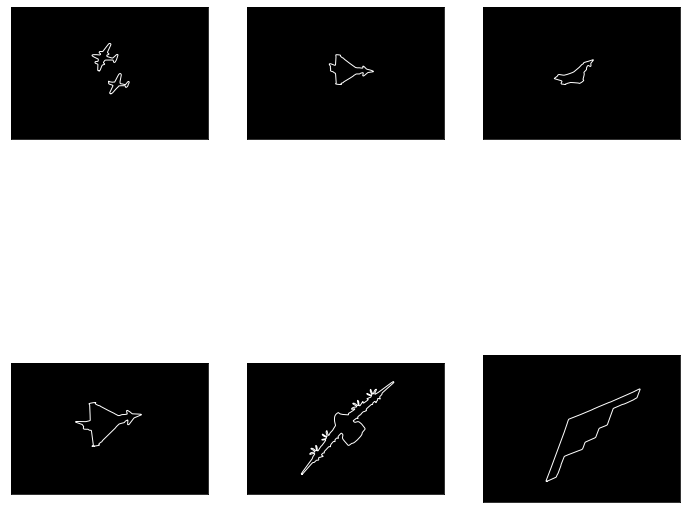

In [141]:
plt.figure(figsize=(12, 12))
for i, file in enumerate(os.listdir(task_1_path), start=1):
    plt.subplot(2, 3, i)
    img = io.imread(f'{task_1_path}{file}')
    h, w = img.shape[0], img.shape[1]
    black_img = np.zeros((h, w))  # the background
    img = preprocess_image_task_1(img)
    contours = find_contours(img)
    plt.imshow(black_img, cmap='gray')  # plotting the background
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=1, color='w')  # plotting the contours
    plt.xticks([])  # removing axis scales
    plt.yticks([])
plt.show()

# Zadanie na 5.0

In [193]:
def preprocess_image_task_2(image):
    img = color.rgb2gray(image)
    img = filters.gaussian(img, sigma=2)
    img = feature.canny(img, sigma=3)
    
    return img

In [196]:
# TODO
# blur the background a bit more so that the edge detector won't mistake clouds for edges
# remove the spaces between the plots
# save the plots as a pdf
# change colors of the contours so that they won't repeat in a picture
# add centroids

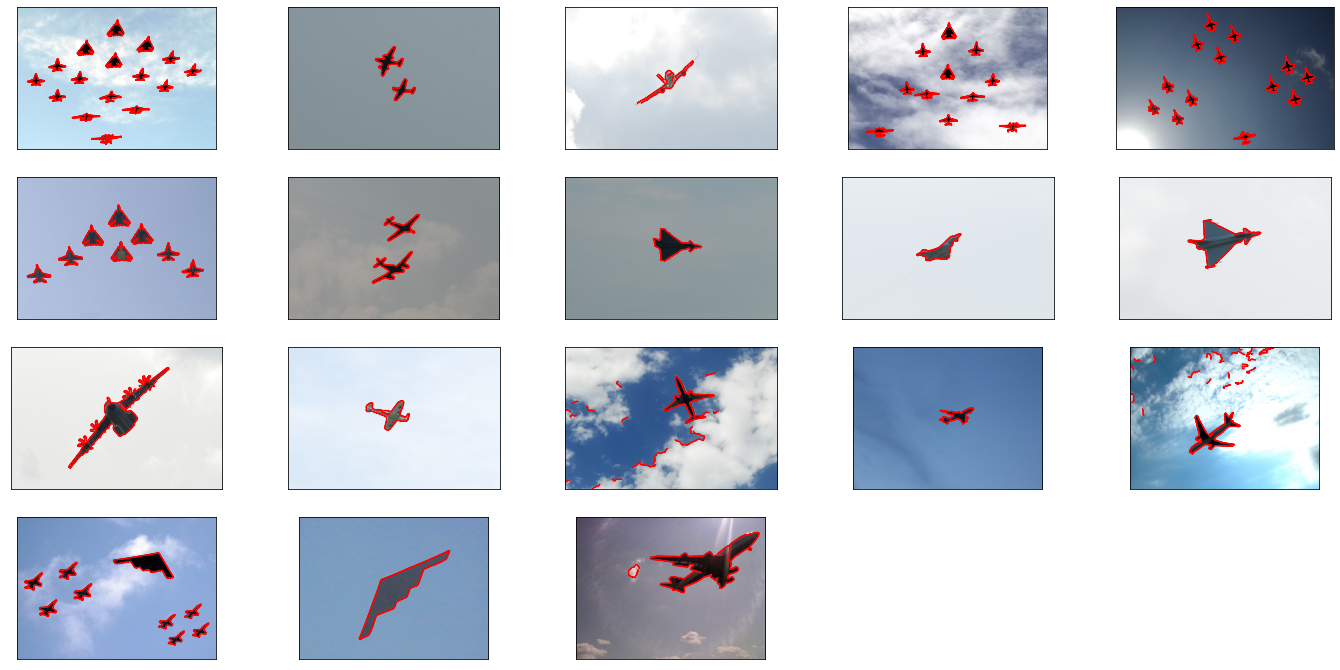

In [195]:
plt.figure(figsize=(24, 12))
for i, file in enumerate(os.listdir(task_2_path), start=1):
    plt.subplot(4, 5, i)
    img = io.imread(f'{task_2_path}{file}')
    img_processed = preprocess_image_task_2(img)
    contours = find_contours(img_processed)
    plt.imshow(img)  # plotting the background
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=1, color='r')  # plotting the contours
    plt.xticks([])
    plt.yticks([])
plt.show()